**Programming Assignment 3 - LOGISTIC REGRESSION**

Ma. Charina O. Gavica <br>
Ma. Cristina F. Jara <br>
Khryzelle Trisha L. Suyat

EMTECH-BATCHSAWA


## ALL DATA CODES


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score
)

**Load the Dataset**

In [64]:
wdbc_df = pd.read_csv('/content/drive/MyDrive/EMTECH_YATSU/ASS#3/breast+cancer+wisconsin+diagnostic/wdbc.data', header=None)

**Manually assign for column names**

In [67]:
column_names = [
    'ID', 'Diagnosis',
    'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean',
    'Compactness_mean', 'Concavity_mean', 'Concave_points_mean', 'Symmetry_mean',
    'Fractal_dimension_mean',
    'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se', 'Smoothness_se',
    'Compactness_se', 'Concavity_se', 'Concave_points_se', 'Symmetry_se',
    'Fractal_dimension_se',
    'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst', 'Smoothness_worst',
    'Compactness_worst', 'Concavity_worst', 'Concave_points_worst', 'Symmetry_worst',
    'Fractal_dimension_worst'
]
wdbc_df.columns = column_names

manually add for column names

In [68]:
# Simulate Metadata Information
print("Simulated Metadata: Variable Information")
print(
    "Features include mean, standard error, and worst (largest) values for "
    "ten real-valued features computed for each cell nucleus:\n"
    "Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, "
    "Concave points, Symmetry, Fractal dimension."
)


Simulated Metadata: Variable Information
Features include mean, standard error, and worst (largest) values for ten real-valued features computed for each cell nucleus:
Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, Concave points, Symmetry, Fractal dimension.


In [69]:
wdbc_df['Diagnosis'] = wdbc_df['Diagnosis'].replace({'M': 1, 'B': 0})

# Separate features and target variable
X = wdbc_df.filter(like='_mean')  # Using only "mean" features
y = wdbc_df['Diagnosis']

# Print the first few rows of features and target
print("\nFirst 5 rows of features (X):")
print(X.head())

print("\nFirst 5 rows of target variable (y):")
print(y.head())


First 5 rows of features (X):
   Radius_mean  Texture_mean  Perimeter_mean  Area_mean  Smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   Compactness_mean  Concavity_mean  Concave_points_mean  Symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   Fractal_dimension_mean  
0                 0.07871  
1    

<ipython-input-69-21c1009def3e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wdbc_df['Diagnosis'] = wdbc_df['Diagnosis'].replace({'M': 1, 'B': 0})


**Target Variable**

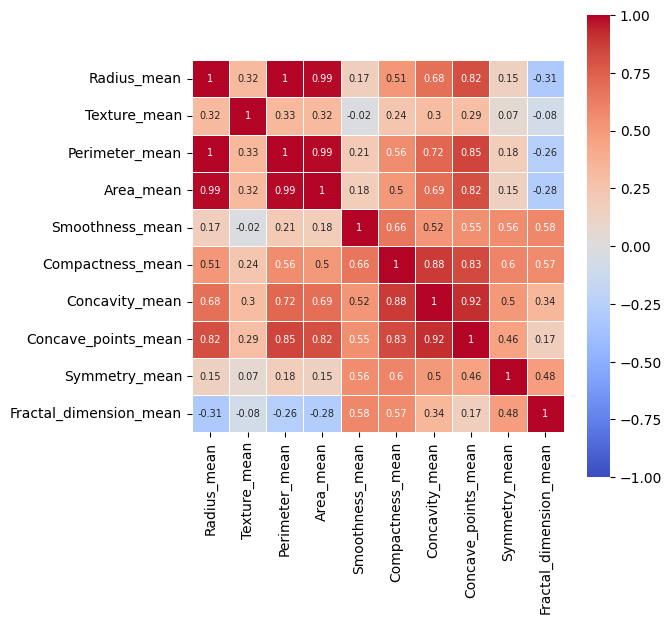

In [60]:
def heatmap(data):
    corr = data.corr().round(2)
    plt.figure(figsize=(6, 6))
    sns.heatmap(
        corr, annot=True, cmap='coolwarm',
        vmin=-1, vmax=1, center=0,
        square=True, linewidths=0.5, annot_kws={"fontsize": 7}
    )
    plt.show()

# Full heatmap
heatmap(X)

It appears that there is a perfect linear relationship between the perimeter, area, and radius, as the radius defines both perimeter and area. To prevent multicollinearity and ensure reliable coefficient estimates, it is necessary to remove both perimeter and area. The same reasoning applies to concavity, compactness, and concave points, suggesting that removing concavity and concave points will help eliminate multicollinearity.

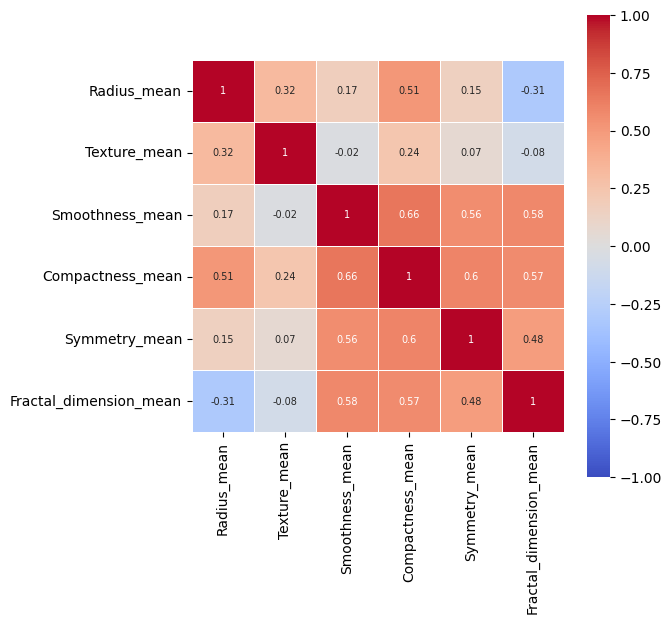

In [51]:
# Focused heatmap (selected features)
selected_features = ['Radius_mean', 'Texture_mean', 'Smoothness_mean', 'Compactness_mean', 'Symmetry_mean', 'Fractal_dimension_mean']
X = X[selected_features]
heatmap(X)

**Split and build the train model**

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=7)

model = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])
model.fit(X_train, y_train)

print(f"Training Accuracy = {model.score(X_train, y_train):.2f}")
print(f"Testing Accuracy = {model.score(X_test, y_test):.2f}")

Training Accuracy = 0.94
Testing Accuracy = 0.92


In [71]:
# Coefficients
for key, coef in zip(X.columns, model.named_steps['model'].coef_[0]):
    print(f"{key}: {coef:.2f}")
print(f"Intercept: {model.named_steps['model'].intercept_[0]:.2f}")

Radius_mean: 3.28
Texture_mean: 1.20
Perimeter_mean: 1.05
Area_mean: 0.99
Smoothness_mean: 0.50
Compactness_mean: -0.49
Intercept: -0.96


The model achieves a training accuracy of 94% and a testing accuracy of 92%. The mean radius is the key factor driving the predictions, with a coefficient of 3.28. The mean texture, smoothness, and compactness contribute similarly to the overall predictions.

**Confusion Matrix**

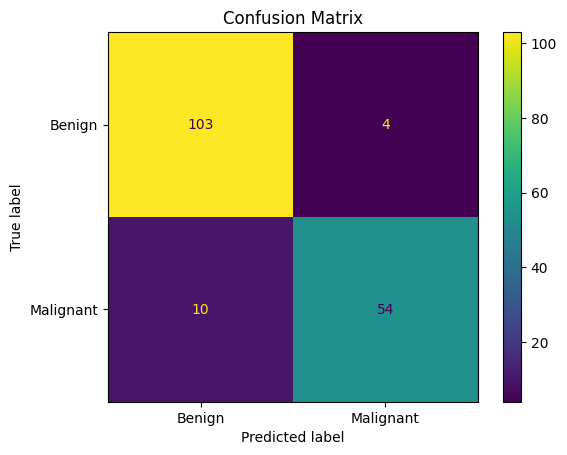

In [72]:
# Confusion Matrix
y_pred = model.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cfm, display_labels=["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()


We chose to label the benign class as False and the malignant class as True. This makes it easier to interpret the labels as indicating whether a lesion is cancerous (malignant) or not.

**Precision/Recall from Confusion Matrix**

In [57]:
# Extract Confusion Matrix Metrics
TN, FP, FN, TP = cfm.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
far = FP / (FP + TN)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"False Alarm Rate: {far:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.93
Recall: 0.84
False Alarm Rate: 0.04
F1-score: 0.89


**The ROC Curve and AUC**

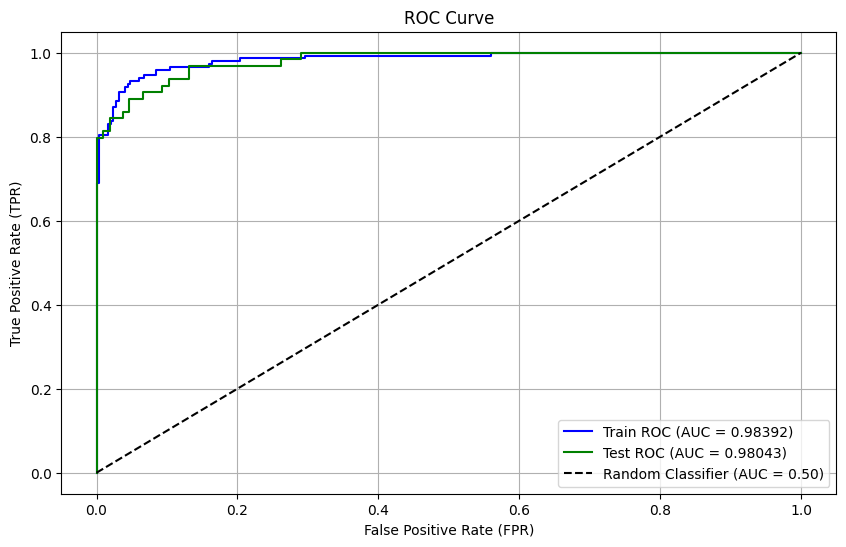

In [59]:
y_train_probs = model.predict_proba(X_train)[:, 1]
y_test_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC Curve and AUC for Training and Testing
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
auc_train = roc_auc_score(y_train, y_train_probs)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
auc_test = roc_auc_score(y_test, y_test_probs)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {auc_train:.5f})", color='blue')
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {auc_test:.5f})", color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)")

plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## GUIDE QUESTIONS

**What steps are required to remove the "Sample code number" column?**
<br>The dataset used does not include a "Sample code number" column. However, if such a column were present, it could be removed using the drop() method of the pandas.DataFrame<br>


---


**How can the "Class" values be converted into binary (0 and 1) form in Python?**
<br>To encode the "Class" values into binary format, we transform the "Diagnosis" column by replacing its values. Based on the dataset, benign and malignant are encoded as 2 and 4, respectively. A straightforward approach is to divide the values by 2 and subtract 1, resulting in binary values: Diagnosis = Diagnosis / 2 - 1.<br>


---


**What is the importance of splitting the dataset into training and testing sets?**
<br>Splitting the dataset ensures that separate data subsets are used for training and testing the model. This practice helps evaluate the model's performance on unseen data, ensuring it generalizes well. In this scenario, the training set was used to fit the logistic regression model.<br>

---


**Why is it necessary to use the stratify parameter in the train_test_split function?**
<br>The stratify parameter maintains the proportion of each class in both the training and testing datasets. This is crucial for ensuring balanced representation of benign (B) and malignant (M) cases in both subsets, which is particularly important for imbalanced datasets.<br>

---



**What is logistic regression, and why is it suitable for this dataset?**
<br>Logistic regression is a classification algorithm designed for predicting categorical outcomes. It is well-suited for this dataset because the target variable represents a binary classification problem with two categories: benign and malignant.<br>

---

**How can the training and testing accuracy of the logistic regression model be calculated?**
<br>The model's accuracy can be derived using a confusion matrix. This matrix provides detailed performance metrics, such as precision, recall, F1-score, and accuracy. It also serves as a foundation for plotting the Receiver Operating Characteristic (ROC) curve, which compares the true positive rate (TPR) against the false positive rate (FPR). A higher area under the ROC curve (AUC) indicates better model performance.<br>

---


**Which features in the dataset are most influential in determining the tumor status, and how can their importance be assessed?**
<br>The most influential are teh higher the absolute coefficient, the more influetial the feature. <br>

1. **Radius:** 3.28
2. **Texture:** 1.20
3. **Perimeter:** 1.05
4. **Area:** .99
5. **Smoothness:** .5
6. **Compactness:** -.49
7. **Intercept:** -0.96



---


**How is a confusion matrix generated, and what does it represent?**
<br>A confusion matrix is generated using the confusion_matrix() function from sklearn.metrics. It provides a comparison between actual and predicted classifications, summarizing true positives, true negatives, false positives, and false negatives. It acts as a key evaluation tool for classification tasks.

<br>

---


**How are precision, recall, F1-score, and false alarm rate calculated from the confusion matrix?**
<br><br>

Here’s the text formatted for Google Colab with proper Markdown and LaTeX integration for mathematical expressions:

---

### **Guide Question 9**  
**How are precision, recall, F1-score, and false alarm rate calculated from the confusion matrix?**

Given a confusion matrix, the metrics can be calculated as follows:  

- **Precision** = TP/TP+FP
- **Recall** = TP/TP+FN
- **F1-Score** = 2((Precision*Recall)/(Precision+Recall)))

- **False Alarm Rate (FAR)** = FP/FP+TN

These formulas can also be computed programmatically using `sklearn.metrics` functions, such as `precision_score`, `recall_score`, and `f1_score`.  

---


**Why are these metrics important for evaluating the performance of a classifier?**
<br>Precision measures the accuracy of positive predictions, ensuring the classifier avoids false positives. Recall evaluates the model's ability to identify actual positives, highlighting its effectiveness in detecting true cases. The F1-score balances precision and recall, offering a single metric to assess overall performance. The false alarm rate indicates the proportion of false positives, which is crucial in understanding the model's reliability. Together, these metrics provide a comprehensive evaluation of the classifier's performance.<br>

---

**What is an ROC curve, and how is it plotted for a logistic regression model?**
<br>An ROC (Receiver Operating Characteristic) curve plots the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds. It was plotted in the code as follows:

*fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  
plt.plot(fpr, tpr)*

 ROC curve provides a visual assessment of the model's performance across all thresholds.
<br>

---

**How is the AUC (Area Under the Curve) calculated, and what does it signify about the model's performance?**
<br>AUC (Area Under the Curve) is calculated using the roc_auc_score() function. A higher AUC value indicates better model performance, signifying its ability to distinguish between classes effectively.<br>

---


**How do the training and testing ROC curves compare, and what insights can be derived from this comparison?**
<br>The training ROC curve typically performs slightly better than the testing ROC curve. A significant difference between the two may indicate overfitting or underfitting. In this case, a minimal difference suggests that the model generalizes well to unseen data.<br>

---


**What challenges did you encounter during the preprocessing or model training phases, and how did you address them?**
<br>code manually selected specific features (radius1, texture1, etc.) based on their importance, which required prior domain knowledge or analysis. By using a heatmap to visualize the correlation between features, helping to identify those most relevant to the target variable and narrowdown some dataset just to include the most influential variables. <br>

---


**If the model's performance is not satisfactory, what adjustments could be made to improve it?**

<br>We can use tools like Recursive Feature Elimination (RFE) or SelectKBest to pick important features automatically. Lasso regression can also help by removing less important features during training. PCA can simplify the data by focusing on key patterns, and talking to experts can provide helpful insights.<br>